In [25]:
import os
import sys
import tarfile
import platform
from torch.utils.data import Dataset, DataLoader

In [88]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import torchvision
from torchvision import transforms, utils

In [107]:
from glob import glob
from PIL import Image
import re

In [30]:
current_os = platform.system()
print(f"Current OS: {current_os}")
print(f"CUDA: {torch.cuda.is_available()}")
print(f"Python Version: {platform.python_version()}")
print(f"torch Version: {torch.__version__}")
print(f"torchvision Version: {torchvision.__version__}")

Current OS: Linux
CUDA: True
Python Version: 3.8.5
torch Version: 1.7.1
torchvision Version: 0.8.2


In [ ]:
#!wget https://aistages-prod-server-public.s3.amazonaws.com/app/Competitions/000074/data/train.tar.gz

In [151]:
p = re.compile('\w+[^0-9.]')

In [154]:
p.findall('incorrect_image.jpg')

['incorrect_image', 'jpg']

In [96]:
path_dir = './input/data/train/'
path_img = os.path.join(path_dir,'images')
os.listdir(path_dir),os.listdir(path_img)[:5]
os.listdir(os.path.join(path_img,'005254_male_Asian_21'))

['._mask3.jpg',
 'incorrect_mask.jpg',
 'mask3.jpg',
 '._mask2.jpg',
 'mask4.jpg',
 '._mask4.jpg',
 '._mask5.jpg',
 '._mask1.jpg',
 'normal.jpg',
 'mask2.jpg',
 '._normal.jpg',
 '._incorrect_mask.jpg',
 'mask5.jpg',
 'mask1.jpg']

In [93]:
train_data = pd.read_csv(os.path.join(path_dir,'train.csv'))

,id,gender,race,age,path
0,000001,female,Asian,45,000001_female_Asian_45
1,000002,female,Asian,52,000002_female_Asian_52
2,000004,male,Asian,54,000004_male_Asian_54
3,000005,female,Asian,58,000005_female_Asian_58
4,000006,female,Asian,59,000006_female_Asian_59


In [157]:
train_data = pd.read_csv('./input/data/train/train.csv')
temp = pd.DataFrame(columns = ['id','path_img','Mask'])
p = re.compile('\w+[^0-9.]')

for _id,_path in zip(train_data.id,train_data.path):
    temp_path = os.path.join(path_img,_path)
    for path in os.listdir(temp_path):
        if path[0] != '.':
            temp=temp.append(pd.DataFrame({'id' : [_id], 'path_img':[os.path.join(temp_path,path)],'Mask':[p.findall(path)[0]]},columns = ['id','path_img','Mask']))
upd_train_data=pd.merge(train_data, temp, how='outer',on='id')

In [166]:
upd_train_data['cls'] = 'NaN'
upd_train_data['cls']= upd_train_data.apply(outputClasses, axis =1)
upd_train_data

,id,gender,race,age,path,path_img,Mask,cls
0,000001,female,Asian,45,000001_female_Asian_45,./input/data/train/images/000001_female_Asian_...,incorrect_mask,NaN
1,000001,female,Asian,45,000001_female_Asian_45,./input/data/train/images/000001_female_Asian_...,mask,NaN
2,000001,female,Asian,45,000001_female_Asian_45,./input/data/train/images/000001_female_Asian_...,mask,NaN
3,000001,female,Asian,45,000001_female_Asian_45,./input/data/train/images/000001_female_Asian_...,normal,NaN
4,000001,female,Asian,45,000001_female_Asian_45,./input/data/train/images/000001_female_Asian_...,mask,NaN
...,...,...,...,...,...,...,...,...
18909,006959,male,Asian,19,006959_male_Asian_19,./input/data/train/images/006959_male_Asian_19...,mask,NaN
18910,006959,male,Asian,19,006959_male_Asian_19,./input/data/train/images/006959_male_Asian_19...,normal,NaN
18911,006959,male,Asian,19,006959_male_Asian_19,./input/data/train/images/006959_male_Asian_19...,mask,NaN
18912,006959,male,Asian,19,006959_male_Asian_19,./input/data/train/images/006959_male_Asian_19...,mask,NaN


In [213]:
def age_cls(age):
    if age < 30:
        return 0
    elif 30 <= age < 60:
        return 1
    else:
        return 2

In [214]:
upd_train_data['age']= upd_train_data['age'].apply(age_cls)

In [172]:
def outputClasses(upd_train_data):
    
    mask, gender, age = upd_train_data.Mask, upd_train_data.gender, upd_train_data.age
    if mask == 'mask':
        if gender == 'male':
            if age<30:
                return 0
            elif 30<=age<60:
                return 1
            else:
                return 2
        else :
            if age<30:
                return 3
            elif 30<=age<60:
                return 4
            else:
                return 5   
    elif mask == 'incorrect_mask':
        if gender == 'male':
            if age<30:
                return 6
            elif 30<=age<60:
                return 7
            else:
                return 8
        else :
            if age<30:
                return 9
            elif 30<=age<60:
                return 10
            else:
                return 11               
    else:
        if gender == 'male':
            if age<30:
                return 12
            elif 30<=age<60:
                return 13
            else:
                return 14
        else :
            if age<30:
                return 15
            elif 30<=age<60:
                return 16
            else:
                return 17  

# Data 분석

1. Gender
2. age
3. Mask 상태
4. class


In [182]:
import matplotlib as mpl
import matplotlib.pyplot as plt

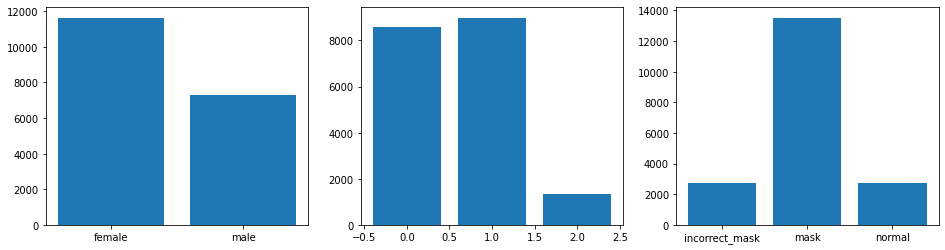

In [216]:
fig = plt.figure(figsize = (16,4))

gender_ax = fig.add_subplot(1,3,1) 
age_ax = fig.add_subplot(1,3,2) 
mask_ax = fig.add_subplot(1,3,3) 

gender_ax.bar(upd_train_data.gender.unique(),upd_train_data.groupby('gender').id.count())
age_ax.bar(upd_train_data.age.unique(),upd_train_data.groupby('age').id.count())
mask_ax.bar(upd_train_data.Mask.unique(),upd_train_data.groupby('Mask').id.count())

plt.show()

- 60세 이상 image data 부족
- 마스크 미착용 or 잘못 착용한 image data 부족

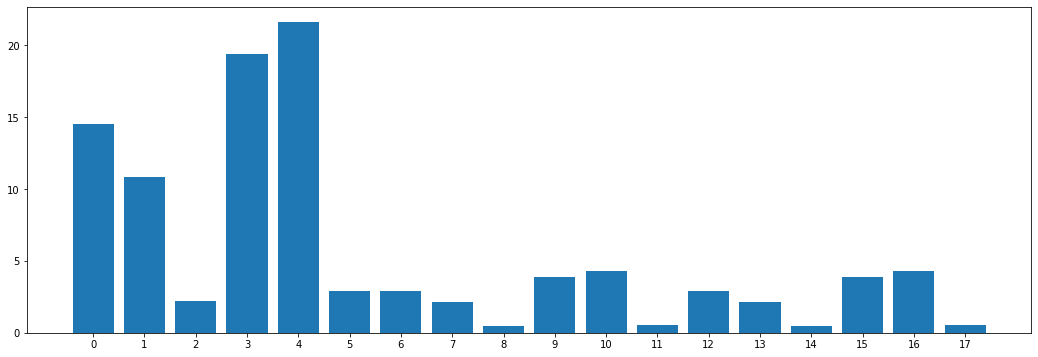

In [278]:
fig = plt.figure(figsize = (18,6))

clss_ax = fig.add_subplot() 
cls_label=[i for i in range(18)]
clss_ax.bar(cls_label,upd_train_data.groupby('cls').cls.count()/upd_train_data.cls.count()*100)
plt.xticks(cls_label)
clss_ax.set_xticklabels(cls_label)

plt.show()

- class 별로 data 숫자 차이가 큼

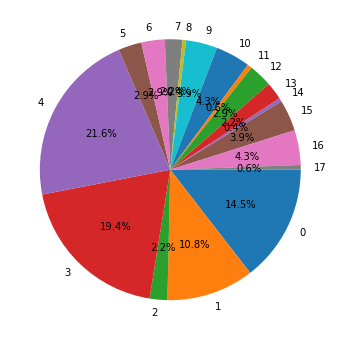

In [298]:
fig = plt.figure(figsize = (6,6))

clss_ax = fig.add_subplot() 
cls_label=[i for i in range(18)]
cls_value = upd_train_data.groupby('cls').id.count()/upd_train_data.id.count()*100
clss_ax.pie(list(cls_value),labels=cls_label, autopct='%.1f%%', startangle=0, counterclock=False)

plt.show()